In [30]:
!pip install tabulate

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px
import os
import geopandas as gpd

In [3]:
df = pd.read_csv('./Datos/sv_202312_metricas_locales.csv', sep=',', encoding='utf-8',quotechar='"')

In [4]:
df.head()

,osm_id,fclass,name,source_layer,footfall_domingo,footfall_lunes,footfall_martes,footfall_miercoles,footfall_jueves,footfall_viernes,...,max_dwell,min_dwell,repeat_visit_rate_daily,peak_hour_weekday,peak_visits_weekday,peak_hour_weekend,peak_visits_weekend,total_devices,horas_con_movimiento_semana,horas_con_movimiento_finsemana
0,14883758,nature_reserve,Reserva de La Biosfera Trifinio,gis_osm_landuse_a_free_1,344.0,299.0,310.0,309.0,324.0,395.0,...,2560944,60,4.88,12,212,12,166,488,24,24
1,1083836455,nature_reserve,Reserva de La Biosfera Apaneca-Ilamatepec,gis_osm_landuse_a_free_1,1557.0,1089.0,1038.0,1080.0,1071.0,1465.0,...,2561351,60,3.68,12,590,15,657,2452,24,24
2,6462346,suburb,Barrio El Centro,gis_osm_places_a_free_1,301.0,433.0,479.0,464.0,452.0,611.0,...,208141,61,2.22,14,221,11,106,1478,24,24
3,803474294,residential,Residencial Valle Tuscanía,gis_osm_landuse_a_free_1,138.0,129.0,130.0,131.0,131.0,185.0,...,782679,62,4.43,21,79,22,49,234,24,24
4,6483184,suburb,Barrio San José,gis_osm_places_a_free_1,562.0,1032.0,1114.0,1103.0,1054.0,1366.0,...,772776,60,2.98,15,443,10,213,2470,24,24


In [8]:
feature_cols = [col for col in df.columns if col.startswith("footfall") or col.endswith("_dwell") or "repeat" in col or "horas_" in col or "peak_visits" in col or "total_devices" in col]

X = df[feature_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

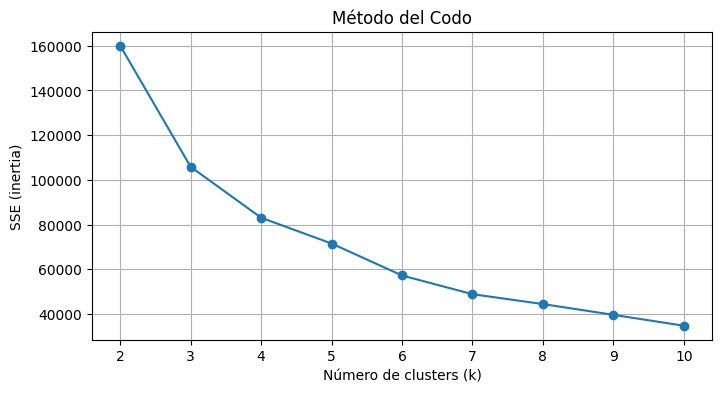

In [10]:
sse = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE (inertia)')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

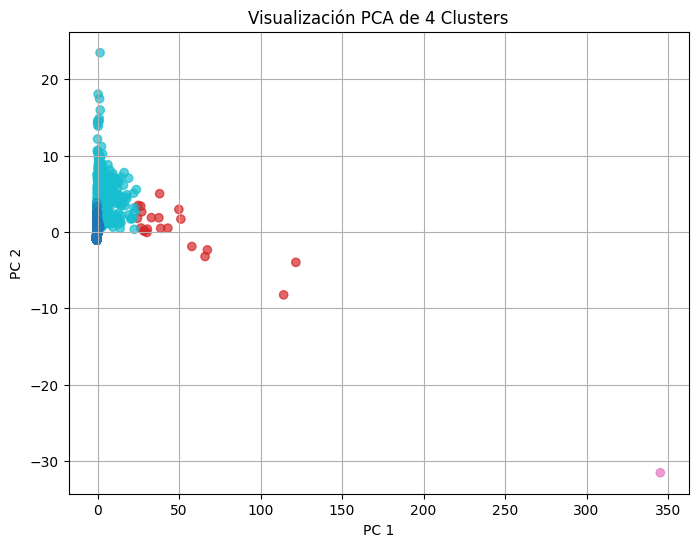

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df["cluster"],        # df debe contener la columna 'cluster'
    cmap="tab10",
    alpha=0.7
)

plt.title("Visualización PCA de 4 Clusters")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()

In [21]:
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Creamos un DataFrame con los componentes y los clusters
df_plotly = pd.DataFrame({
    "PC1": X_pca_3d[:, 0],
    "PC2": X_pca_3d[:, 1],
    "PC3": X_pca_3d[:, 2],
    "cluster": df["cluster"].astype(str)  # como texto para que Plotly lo coloree categóricamente
})

# Gráfico interactivo 3D
fig = px.scatter_3d(
    df_plotly,
    x="PC1",
    y="PC2",
    z="PC3",
    color="cluster",
    opacity=0.7,
    title="Clusters en PCA 3D (Interactivo)"
)

fig.update_traces(marker=dict(size=4))  # tamaño del punto
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

In [26]:
df[df.cluster==0]

,osm_id,fclass,name,source_layer,footfall_domingo,footfall_lunes,footfall_martes,footfall_miercoles,footfall_jueves,footfall_viernes,...,min_dwell,repeat_visit_rate_daily,peak_hour_weekday,peak_visits_weekday,peak_hour_weekend,peak_visits_weekend,total_devices,horas_con_movimiento_semana,horas_con_movimiento_finsemana,cluster
346,39401733,building,Mercado Sagrado Corazón de Jesus,gis_osm_buildings_a_free_1,13.0,17.0,18.0,23.0,14.0,38.0,...,0,1.65,14,14,12,9,95,13,10,0
368,396100311,building,Insaforp,gis_osm_buildings_a_free_1,0.0,10.0,15.0,9.0,12.0,12.0,...,615,5.17,9,8,15,1,12,13,4,0
410,8065145,building,Oficinas Administrativas del ISSS,gis_osm_buildings_a_free_1,4.0,21.0,28.0,27.0,28.0,25.0,...,0,2.12,12,17,12,4,69,15,10,0
470,39317397,building,Fondo Social de la Vivienda,gis_osm_buildings_a_free_1,0.0,19.0,24.0,24.0,18.0,29.0,...,0,4.21,14,12,9,2,28,13,8,0
482,436512098,residential,Condominio Galeria Central,gis_osm_landuse_a_free_1,5.0,12.0,13.0,12.0,11.0,14.0,...,0,1.70,14,11,11,4,47,13,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11392,379397019,fuel,UNO,gis_osm_traffic_a_free_1,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1.00,14,1,-1,0,1,1,0,0
11393,399125555,police,PNC,gis_osm_pois_a_free_1,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1.00,-1,0,12,1,1,0,1,0
11394,398618344,fuel,UNO,gis_osm_traffic_a_free_1,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1.00,9,1,-1,0,1,1,0,0
11395,422116511,fuel,Uno,gis_osm_traffic_a_free_1,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1.00,9,1,-1,0,1,1,0,0


In [27]:
cluster_summary = df.groupby("cluster").mean(numeric_only=True).round(2)

In [28]:
cluster_summary["n_locales"] = df.groupby("cluster").size()

In [31]:
summary_text = cluster_summary.reset_index().to_markdown(index=False)
print(summary_text)

|   cluster |      osm_id |   footfall_domingo |   footfall_lunes |   footfall_martes |   footfall_miercoles |   footfall_jueves |   footfall_viernes |   footfall_sabado |   footfall_manana_weekend |   footfall_tarde_weekend |   footfall_noche_weekend |   footfall_madrugada_weekend |   footfall_manana_semana |   footfall_tarde_semana |   footfall_noche_semana |   footfall_madrugada_semana |   avg_dwell |        max_dwell |   min_dwell |   repeat_visit_rate_daily |   peak_hour_weekday |   peak_visits_weekday |   peak_hour_weekend |   peak_visits_weekend |   total_devices |   horas_con_movimiento_semana |   horas_con_movimiento_finsemana |   n_locales |
|----------:|------------:|-------------------:|-----------------:|------------------:|---------------------:|------------------:|-------------------:|------------------:|--------------------------:|-------------------------:|-------------------------:|-----------------------------:|-------------------------:|------------------------:|---

In [33]:
df.head()

,osm_id,fclass,name,source_layer,footfall_domingo,footfall_lunes,footfall_martes,footfall_miercoles,footfall_jueves,footfall_viernes,...,min_dwell,repeat_visit_rate_daily,peak_hour_weekday,peak_visits_weekday,peak_hour_weekend,peak_visits_weekend,total_devices,horas_con_movimiento_semana,horas_con_movimiento_finsemana,cluster
0,14883758,nature_reserve,Reserva de La Biosfera Trifinio,gis_osm_landuse_a_free_1,344.0,299.0,310.0,309.0,324.0,395.0,...,60,4.88,12,212,12,166,488,24,24,1
1,1083836455,nature_reserve,Reserva de La Biosfera Apaneca-Ilamatepec,gis_osm_landuse_a_free_1,1557.0,1089.0,1038.0,1080.0,1071.0,1465.0,...,60,3.68,12,590,15,657,2452,24,24,1
2,6462346,suburb,Barrio El Centro,gis_osm_places_a_free_1,301.0,433.0,479.0,464.0,452.0,611.0,...,61,2.22,14,221,11,106,1478,24,24,1
3,803474294,residential,Residencial Valle Tuscanía,gis_osm_landuse_a_free_1,138.0,129.0,130.0,131.0,131.0,185.0,...,62,4.43,21,79,22,49,234,24,24,3
4,6483184,suburb,Barrio San José,gis_osm_places_a_free_1,562.0,1032.0,1114.0,1103.0,1054.0,1366.0,...,60,2.98,15,443,10,213,2470,24,24,1


Agregando los poligonos de las locations, primero debo generar el geopandas de las locations sin duplicados al igual que en databricks

In [39]:
shapes_dir = "./Datos/shapes"

gdfs = []

for filename in os.listdir(shapes_dir):
    if filename.endswith(".geojson"):
      file_path = os.path.join(shapes_dir, filename)
      gdf = gpd.read_file(file_path)
      gdfs.append(gdf)

gdf_zonas = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
gdf_zonas = gdf_zonas.set_crs("EPSG:4326")

print(gdf_zonas.columns)

Index(['osm_id', 'code', 'fclass', 'name', 'type', 'source_layer', 'geometry',
       'population'],
      dtype='object')


In [41]:
gdf_zonas['source_layer'].value_counts()

source_layer
gis_osm_buildings_a_free_1    622107
gis_osm_pois_a_free_1          10699
gis_osm_landuse_a_free_1        9198
gis_osm_traffic_a_free_1        1524
gis_osm_pofw_a_free_1            875
gis_osm_places_a_free_1          178
gis_osm_natural_a_free_1         120
gis_osm_transport_a_free_1       109
Name: count, dtype: int64

In [42]:
layer_ranking = {
"gis_osm_buildings_a_free_1": 5,
"gis_osm_pois_a_free_1": 8,
"gis_osm_landuse_a_free_1": 2,
"gis_osm_traffic_a_free_1": 4,
"gis_osm_pofw_a_free_1": 7,   
"gis_osm_places_a_free_1": 6,
"gis_osm_natural_a_free_1": 1,
"gis_osm_transport_a_free_1": 3
}

gdf_zonas['rank'] = gdf_zonas['source_layer'].map(layer_ranking)
gdf_zonas_unique = gdf_zonas.sort_values('rank').drop_duplicates('osm_id', keep='first').drop(columns=['rank'])

In [43]:
print(f"Registros en DF: {len(gdf_zonas_unique)}")
print(f"Ids unicos (osm_id) en DF: {gdf_zonas_unique['osm_id'].nunique()}")

Registros en DF: 636747
Ids unicos (osm_id) en DF: 636747


In [44]:
gdf_zonas_unique['source_layer'].value_counts()

source_layer
gis_osm_buildings_a_free_1    621838
gis_osm_landuse_a_free_1        9180
gis_osm_pois_a_free_1           3790
gis_osm_traffic_a_free_1        1522
gis_osm_places_a_free_1          174
gis_osm_natural_a_free_1         120
gis_osm_transport_a_free_1       105
gis_osm_pofw_a_free_1             18
Name: count, dtype: int64

In [58]:
gdf_zonas_unique['osm_id']=gdf_zonas_unique['osm_id'].astype(int)

In [59]:
gdf_zonas_unique.head()

,osm_id,code,fclass,name,type,source_layer,geometry,population
631394,8392130,4141,beach,Playa La Paz,NaN,gis_osm_natural_a_free_1,"POLYGON ((-89.32358 13.48552, -89.3235 13.4856...",NaN
631360,6154405,4141,beach,Playa Pedrero Menudo,NaN,gis_osm_natural_a_free_1,"POLYGON ((-87.75982 13.24569, -87.7598 13.2460...",NaN
631361,6157566,4141,beach,None,NaN,gis_osm_natural_a_free_1,"POLYGON ((-87.71548 13.21546, -87.71542 13.215...",NaN
631362,6154402,4141,beach,Playa Brava,NaN,gis_osm_natural_a_free_1,"POLYGON ((-87.75659 13.22593, -87.75654 13.226...",NaN
631363,6180048,4141,beach,None,NaN,gis_osm_natural_a_free_1,"POLYGON ((-87.75633 13.24041, -87.7563 13.2405...",NaN


In [61]:
df = df.merge(
    gdf_zonas_unique[['osm_id', 'geometry']],
    on='osm_id',
    how='inner'
)

In [63]:
df.head()

,osm_id,fclass,name,source_layer,footfall_domingo,footfall_lunes,footfall_martes,footfall_miercoles,footfall_jueves,footfall_viernes,...,repeat_visit_rate_daily,peak_hour_weekday,peak_visits_weekday,peak_hour_weekend,peak_visits_weekend,total_devices,horas_con_movimiento_semana,horas_con_movimiento_finsemana,cluster,geometry
0,14883758,nature_reserve,Reserva de La Biosfera Trifinio,gis_osm_landuse_a_free_1,344.0,299.0,310.0,309.0,324.0,395.0,...,4.88,12,212,12,166,488,24,24,1,"POLYGON ((-89.59262 14.31443, -89.59261 14.314..."
1,1083836455,nature_reserve,Reserva de La Biosfera Apaneca-Ilamatepec,gis_osm_landuse_a_free_1,1557.0,1089.0,1038.0,1080.0,1071.0,1465.0,...,3.68,12,590,15,657,2452,24,24,1,"POLYGON ((-89.84988 13.85847, -89.84982 13.859..."
2,6462346,suburb,Barrio El Centro,gis_osm_places_a_free_1,301.0,433.0,479.0,464.0,452.0,611.0,...,2.22,14,221,11,106,1478,24,24,1,"POLYGON ((-89.19426 13.69589, -89.19408 13.696..."
3,803474294,residential,Residencial Valle Tuscanía,gis_osm_landuse_a_free_1,138.0,129.0,130.0,131.0,131.0,185.0,...,4.43,21,79,22,49,234,24,24,3,"POLYGON ((-89.28949 13.6137, -89.28925 13.6155..."
4,6483184,suburb,Barrio San José,gis_osm_places_a_free_1,562.0,1032.0,1114.0,1103.0,1054.0,1366.0,...,2.98,15,443,10,213,2470,24,24,1,"POLYGON ((-89.19692 13.69879, -89.19682 13.699..."


In [64]:
import csv
df.to_csv('./Datos/sv_202312_clusters_georef.csv', encoding='utf-8', index=False, quoting=csv.QUOTE_ALL)